In [51]:
# block 1: import all important libraries

%matplotlib inline
from netCDF4 import Dataset
from netCDF4 import num2date
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio
import pandas as pd
import numpy as np
import numpy.ma as ma
from math import sqrt 

In [52]:
# block 2: Import the used data file and create a variable with the data in the file

data = "/home/z3525831/Data/IMOS_ANMN-NRS_AETVZ_20120325T002056Z_SEQ200-SubSurface_FV01_SEQ200-SubSurface-120325-Workhorse-ADCP-110_END-20130606T202300Z_C-20131119T020203Z.nc"
ADCP200 = Dataset(data)  

In [53]:
# block 3: Extracting the U/V/lat/long/time/H_B_S/qc data from the import file and assigns them to a variable

#basic data 
LAT = ADCP200.variables['LATITUDE']
LON = ADCP200.variables['LONGITUDE']
TIMES = ADCP200.variables['TIME']
DEPTH = ADCP200.variables['DEPTH']
V = ADCP200.variables['VCUR']
U = ADCP200.variables['UCUR']
W = ADCP200.variables['WCUR']
Wheight = ADCP200.variables['HEIGHT_ABOVE_SENSOR']

#quality control
hasqc = ADCP200.variables['HEIGHT_ABOVE_SENSOR_quality_control']
Vqc = ADCP200.variables['VCUR_quality_control']
Uqc = ADCP200.variables['UCUR_quality_control']
Dqc = ADCP200.variables['DEPTH_quality_control']
tqc = ADCP200.variables['TIME_quality_control']

In [54]:
#block 4: Convert the ADCP time serie dataset (Matlab to python time serie: yyyy/mm/dd hh/mm/ss)

units = ADCP200.variables['TIME'].units
calendar = ADCP200.variables['TIME'].calendar
times = num2date(ADCP200.variables['TIME'][:], units=units, calendar=calendar)

In [55]:
#block 5: Creat variable with ADCP dataset 

#For the basic data
dph = DEPTH[:,0,0]
latData =  LAT[:]      
lonData = LON[:]       
Wcolumn = Wheight[:]   
data_u = U [:,:,:,:]
data_v = V [:,:,:,:]
v2d = data_v[:,:,0,0]
u2d = data_u[:,:,0,0]


#For the quality controle data 
hasqc1 = hasqc[:]
Vqc1 = Vqc[:,:,0,0]
Uqc1 = Uqc[:,:,0,0]
Dqc1 = Dqc[:,0,0]

In [56]:
#block 6: Mask the wrong values and creat a new variable with the good values.
hasqc2 = ma.masked_where (hasqc1 != 4, Wcolumn)
Dqc2 = ma.masked_where (Dqc1 != 1, dph)
Vqc2 = ma.masked_where (Vqc1 != 1,v2d)
Uqc2 = ma.masked_where (Uqc1 != 1,u2d )

In [57]:
#block 6: reshape the depth of the mooring(dph) and the depth above the sensor(Wcolumn) for have the same shape.

dph14=np.kron(np.ones((14,1)),Dqc2) # repeated the dph 14 times to match size of v2d.
dph14f = ma.masked_where (dph14 < 0,dph14)
Wtime=np.kron(np.ones((20832,1)),hasqc2)

In [58]:
#block 7: Creation of the real depth variable.

DepthReal = dph14f-Wtime.T

In [59]:
#block 8: Creat new variable for the study depth.

depthBin = np.array([5,15,25,35,45,55,65,75,85,95])
depthBin3 = np.array([50,60,70,80,90,100])

In [60]:
#block 9: Use the loop to have mean velocity V depending on the depth.
# Start to 40m below the surface for clean wrong surface data.
Vresult = [ ]
for i in range(40,100,10):   
    vi= Vqc2[np.where((DepthReal.T > i) & (DepthReal.T < i+10))]  
    print(np.shape(vi))
    print(np.mean(vi))
    Vresult.append(( np.mean(vi)))

(24341,)
-0.6082396874449024
(24503,)
-0.5738721137645044
(29455,)
-0.44941988748652534
(25346,)
-0.4877600140217707
(24341,)
-0.462157054153534
(24503,)
-0.4113489477330793


(-0.3, -0.7)

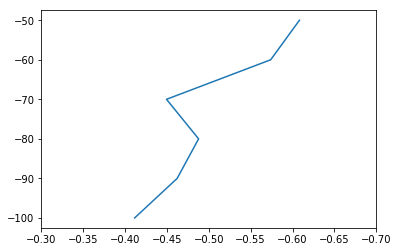

In [61]:
#block 10: Graph for the V velocity mean according to the depht.

plt.plot(Vresult,-depthBin3)
plt.xlim(-0.3,-0.7)

In [62]:
#block 11: Use the loop to have mean velocity U depending on the depth.

Uresult = [ ]
for i in range(40,100,10):
   
    vi= Uqc2[np.where((DepthReal.T > i) & (DepthReal.T < i+10))]  
    print(np.shape(vi))
    print(np.mean(vi))
    #print(np.std(vi)) 
    Uresult.append(( np.mean(vi)))

(24341,)
0.003236302599299709
(24503,)
0.007534417155899317
(29455,)
0.0013706082540409967
(25346,)
0.013497965846092582
(24341,)
0.016919564070528043
(24503,)
0.021230329674525966


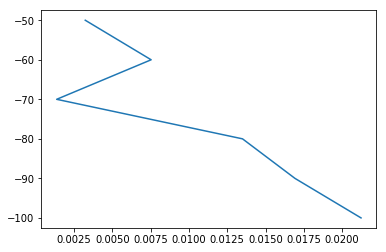

In [63]:
#bock 12: Graph for the U velocity mean according to the depht.

plt.plot(Uresult,-depthBin3)

In [64]:
#block 13: Creat the mean Speed variable with U and V.

Speed = (Uqc2*Uqc2) + (Vqc2*Vqc2)
Speedf = np.sqrt(Speed)  

/home/z3525831/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [65]:
#block 14: Use the loop to have mean Speed depending on the depth.


Speedfm = [ ]
for i  in range(40,100,10):  
    vi= Speedf [np.where((DepthReal.T > i) & (DepthReal.T < i+10))]  
    print(np.shape(vi))
    print(np.mean(vi))
    #print(np.std(vi)) 
    Speedfm.append(( np.mean(vi)))

(24341,)
0.6815810937293384
(24503,)
0.6513293586961263
(29455,)
0.5454140512711103
(25346,)
0.5734334303140046
(24341,)
0.5463181810208972
(24503,)
0.4975219086952756


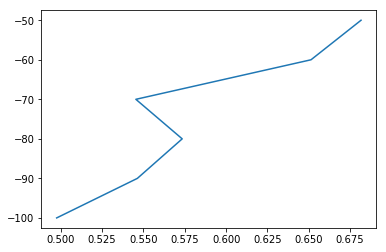

In [66]:
#bock 15: Graph for the mean Speed according to the depht.

plt.plot(Speedfm,-depthBin3)     

In [67]:
#block 16: Creat the mean Power variable.

P = 0.5 * 1025 * 4 * (Speedf*Speedf*Speedf)     
Pf = P/1000

In [68]:
#block 17: Use the loop to have mean Power depending to the depth.

Pfm = [ ]
for i in range(40,100,10):
   
    vi= Pf[np.where((DepthReal.T > i) & (DepthReal.T < i+10))]  
    print(np.shape(vi))
    print(np.mean(vi))
    #print(np.std(vi)) 
    Pfm.append(( np.mean(vi)))

(24341,)
1.1203631898223652
(24503,)
1.0124248876723085
(29455,)
0.7039859049362199
(25346,)
0.7045715220560768
(24341,)
0.6205758906405164
(24503,)
0.5057572065939895


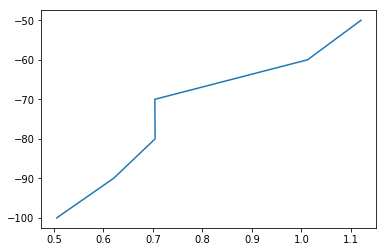

In [69]:
#bock 18: Graph for the mean Power according to the depht.

plt.plot(Pfm,-depthBin3)